In [1]:
!pip install kaggle    #kaggle에서 데이터셋 로드
from google.colab import files
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification
!unzip -q gtzan-dataset-music-genre-classification.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
 99% 1.20G/1.21G [00:10<00:00, 109MB/s]
100% 1.21G/1.21G [00:10<00:00, 129MB/s]


In [10]:
import librosa
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import pandas as pd #데이터 로드

df = pd.read_csv('Data/features_3_sec.csv')

In [16]:
X = df.drop(columns=['filename','length','label']) #전처리
y = df['label'] #장르명

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns=X.columns)

In [17]:
from sklearn.model_selection import train_test_split #데이터셋 분할

X_train , X_test , y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=2021)

In [8]:
from xgboost import XGBClassifier #xgboost 모델, 학습 및 검즘
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train_encoded)

y_preds_encoded = xgb.predict(X_test)
y_preds = label_encoder.inverse_transform(y_preds_encoded)

print('Accuracy: %.4f' % accuracy_score(y_test, y_preds))

Accuracy: 0.9044


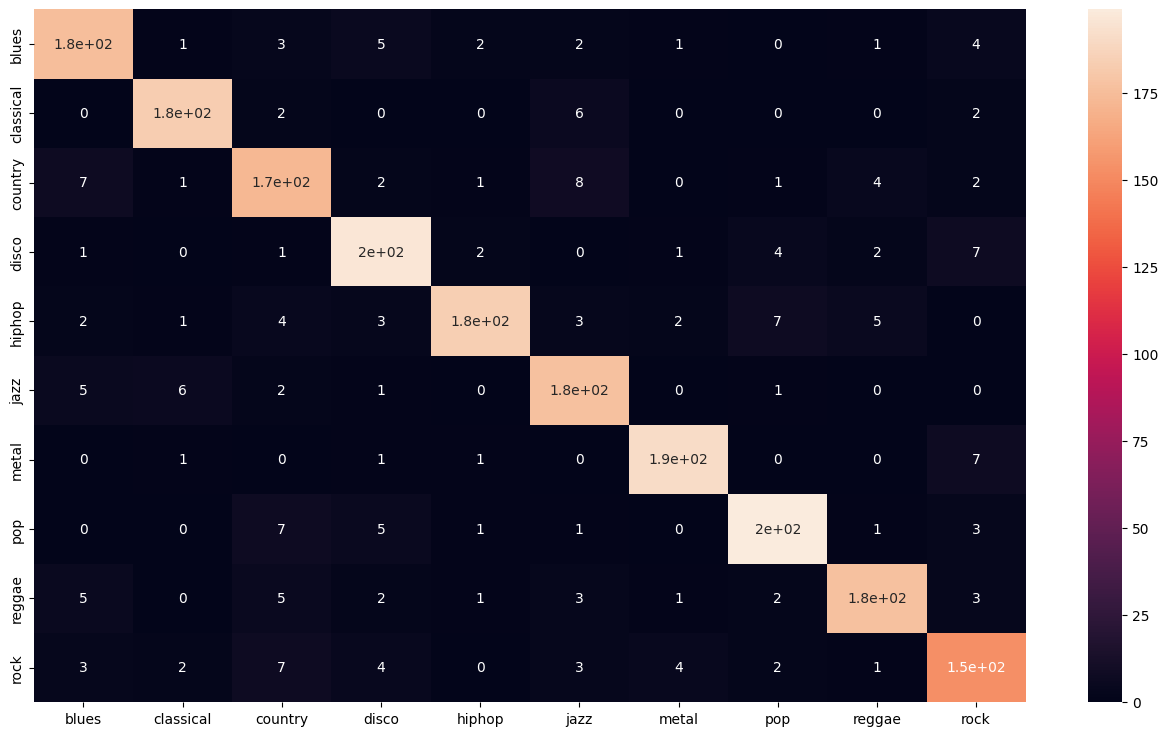

In [11]:
from sklearn.metrics import confusion_matrix #혼동 행렬
import seaborn as sns

cm = confusion_matrix(y_test,y_preds)

plt.figure(figsize=(16,9))
sns.heatmap(
    cm,
    annot=True,
    xticklabels=["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"],
    yticklabels=["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"]
)
plt.show()